<h1 align="center">NLP Final Project</h1>

Problem Statement: Classifying Amazon reviews based on customer ratings using NLP

<h4 align="center">Impact</h4>

Reviews provide objective feedback to a product and are therefore inherently useful for consumers. These ratings are often summarized by a numerical rating, or the number of stars. Of course there is more value in the actual text itself than the quantified stars. And at times, the given rating does not truly convey the experience of the product – the heart of the feedback is actually in the text itself. The goal therefore is to build a classifier that would understand the essence of a piece of review and assign it the most appropriate rating based on the meaning of the text.

<h4 align="center">Background</h4>

Though product ratings on Amazon are aggregated from all the reviews by every customer, each individual rating is actually only an integer that ranges from one star to five stars. This reduces our predictions to discrete classes totaling five possibilities. Therefore what we'll have is a supervised, multi-class classifier with the actual review text as the core predictor.

This study is an exploration of Natural Language Processing (NLP). The goal of predicting the star rating given a piece of text will take on different NLP topics including word embedding, topic modeling, and dimension reduction. From there, we'll arrive at a final dataframe and we'll be employing different machine learning techniques in order to come up with the best approach (i.e. most accurate estimator) for our classifier.


In [1]:
import warnings

warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", DeprecationWarning)

In [2]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

display(df.head(10))

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"
5,A2JXAZZI9PHK9Z,0594451647,"Billy G. Noland ""Bill Noland""","[3, 3]",I am using this with a Nook HD+. It works as d...,5,HDMI Nook adapter cable,1388707200,"01 3, 2014"
6,A2P5U7BDKKT7FW,0594451647,Christian,"[0, 0]",The cable is very wobbly and sometimes disconn...,2,Cheap proprietary scam,1398556800,"04 27, 2014"
7,AAZ084UMH8VZ2,0594451647,"D. L. Brown ""A Knower Of Good Things""","[0, 0]",This adaptor is real easy to setup and use rig...,5,A Perfdect Nook HD+ hook up,1399161600,"05 4, 2014"
8,AEZ3CR6BKIROJ,0594451647,Mark Dietter,"[0, 0]",This adapter easily connects my Nook HD 7&#34;...,4,A nice easy to use accessory.,1405036800,"07 11, 2014"
9,A3BY5KCNQZXV5U,0594451647,Matenai,"[3, 3]",This product really works great but I found th...,5,This works great but read the details...,1390176000,"01 20, 2014"


Data is too big to work on Colab. Thats why the df dataframe shuffled and splitted into 20 parts.

In [3]:
shuffled=df.sample(frac=1)    # "shuffles" the data in dataframe

In [4]:
import numpy as np

result=np.array_split(shuffled,20)    # splitted

In [5]:
df1 = result[0].reset_index().drop("index" , axis=1)

In [6]:
df1.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2VGUYAXGAS8AH,B0039BPG1A,"Ancient One ""Irish New Yorican""","[0, 0]",This bag has been all over the world with me a...,4,Sturdy and it has all the space I need.,1400803200,"05 23, 2014"
1,A3EQ44T4OGCIDR,B009MPBFNU,"H. Q. Pham ""Tech enthusiastic""","[0, 0]",It's fast and functional laptop.Many reviews d...,4,Good but has some issues.,1364428800,"03 28, 2013"
2,AWH2AY17ZU7W2,B00007E7JU,Jesse Baynard,"[0, 0]","It took Amazon over a month to get this to me,...",5,Best Bargain For EOS Cameras,1133740800,"12 5, 2005"
3,A3NDUCTKMT5O6Z,B003BLB2T8,Brandon,"[0, 0]","My Macbook 11&#34; fits in here, with my iPad ...",5,Love this bag!,1377648000,"08 28, 2013"
4,A2MLBWQ7PG55IQ,B001KZ6HQ0,Betty Ganung,"[0, 0]",Batteries still take to long to charge but tha...,5,Handy to have on a trip,1363219200,"03 14, 2013"


In [7]:
df1.to_csv("amazon.csv")

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84460 entries, 0 to 84459
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   reviewerID      84460 non-null  object
 1   asin            84460 non-null  object
 2   reviewerName    83185 non-null  object
 3   helpful         84460 non-null  object
 4   reviewText      84460 non-null  object
 5   overall         84460 non-null  int64 
 6   summary         84460 non-null  object
 7   unixReviewTime  84460 non-null  int64 
 8   reviewTime      84460 non-null  object
dtypes: int64(2), object(7)
memory usage: 5.8+ MB


In [9]:
df1.shape

(84460, 9)

In [10]:
df = df1.drop(["reviewerID","asin","reviewerName","helpful","summary","unixReviewTime","reviewTime"],axis=1)

In [11]:
df["reviewText"]=df["reviewText"].str.lower() #küçük harfe çevrildi
df["reviewText"]=df["reviewText"].str.replace("[^\w\s]","") #noktalama işaretlerini kaldırır
df["reviewText"]=df["reviewText"].str.replace("\d+","") #d digit rakamları kaldırır
df["reviewText"]=df["reviewText"].str.replace("\n"," ").replace("\r","")

In [12]:
df.loc[df["overall"]==3,"sentimentOverall"]="neutral"
df.loc[df["overall"]<3,"sentimentOverall"]="negative"
df.loc[df["overall"]>3,"sentimentOverall"]="positive"

In [13]:
df

,reviewText,overall,sentimentOverall
0,this bag has been all over the world with me a...,4,positive
1,its fast and functional laptopmany reviews did...,4,positive
2,it took amazon over a month to get this to me ...,5,positive
3,my macbook fits in here with my ipad mini a b...,5,positive
4,batteries still take to long to charge but tha...,5,positive
...,...,...,...
84455,it took us a few minutes from opening the box ...,2,negative
84456,nice to be able to forward reverse and rewind ...,5,positive
84457,,4,positive
84458,the design fit and finish of this spiderholste...,5,positive


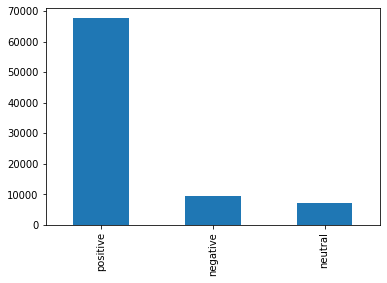

In [14]:
df["sentimentOverall"].value_counts().plot.bar()

In [15]:
df["reviewText"][0]

'this bag has been all over the world with me and has been through storms and freezing weather it has always protected my equipment'

In [16]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
df['tokenized']=[tokenizer.tokenize(str(i)) for i in df['reviewText'].values]

In [17]:
# !pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import nltk
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [19]:
from textblob import TextBlob
df[["polarity","subjectivity"]]=df["reviewText"].apply(lambda t:pd.Series(TextBlob(t).sentiment))

In [20]:
df.loc[df['subjectivity']>0.5,'sentimentPolarity']="positive" #positive
df.loc[df['subjectivity']==0.5,'sentimentPolarity']="neutral" #neutral
df.loc[df['subjectivity']<0.5,'sentimentPolarity']="negative" #negative

In [21]:
df.head()

,reviewText,overall,sentimentOverall,tokenized,polarity,subjectivity,sentimentPolarity
0,this bag has been all over the world with me a...,4,positive,"[this, bag, has, been, all, over, the, world, ...",0.000000,0.000000,negative
1,its fast and functional laptopmany reviews did...,4,positive,"[its, fast, and, functional, laptopmany, revie...",0.186616,0.569444,positive
2,it took amazon over a month to get this to me ...,5,positive,"[it, took, amazon, over, a, month, to, get, th...",0.350463,0.473920,negative
3,my macbook fits in here with my ipad mini a b...,5,positive,"[my, macbook, fits, in, here, with, my, ipad, ...",0.427083,0.664583,positive
4,batteries still take to long to charge but tha...,5,positive,"[batteries, still, take, to, long, to, charge,...",0.365000,0.700000,positive


In [23]:
df.to_csv("result_df.csv")  # in case of a crash

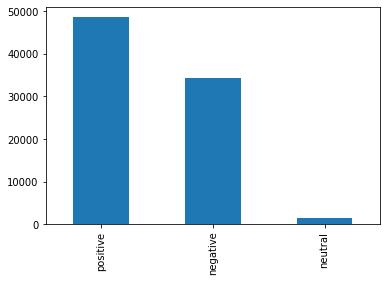

In [24]:
df["sentimentPolarity"].value_counts().plot(kind="bar")

Sentiment analysis differences of overall scores and comments (reviewText)

In [25]:
df[["sentimentOverall","sentimentPolarity"]]

,sentimentOverall,sentimentPolarity
0,positive,negative
1,positive,positive
2,positive,negative
3,positive,positive
4,positive,positive
...,...,...
84455,negative,positive
84456,positive,positive
84457,positive,negative
84458,positive,positive


In [26]:
# pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [34]:
def wc(data,bgcolor):
    from PIL import Image
    wc=WordCloud(background_color=bgcolor, width=800, height=400,max_words=200).generate(' '.join(data))
    plt.figure( figsize=(20,10) )
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

In [36]:
positive_df=df[df["sentimentOverall"]=="positive"]["reviewText"]
negative_df=df[df["sentimentOverall"]=="negative"]["reviewText"]
neutral_df=df[df["sentimentOverall"]=="neutral"]["reviewText"]

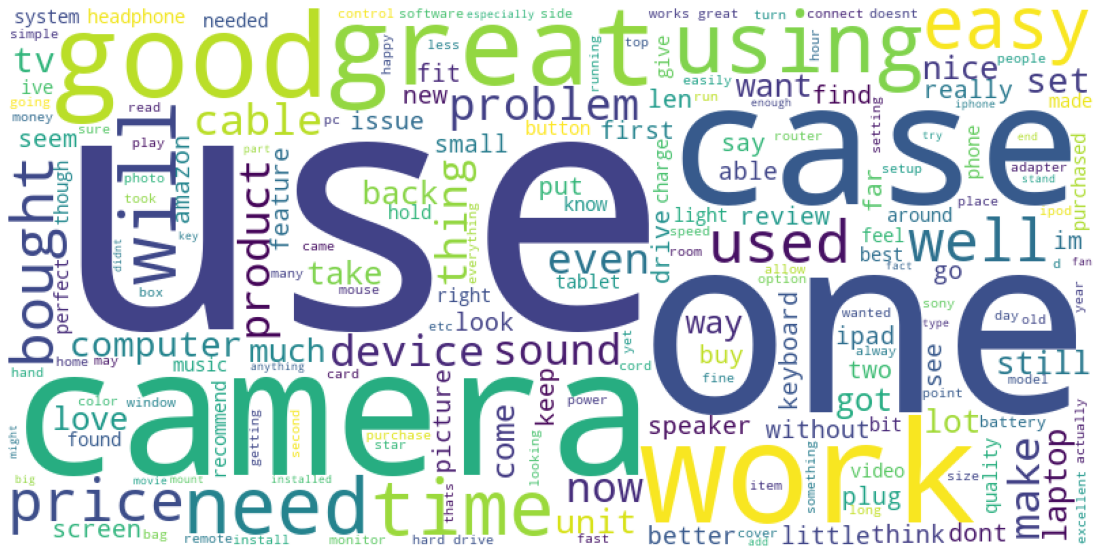

In [37]:
wc(positive_df,"white")

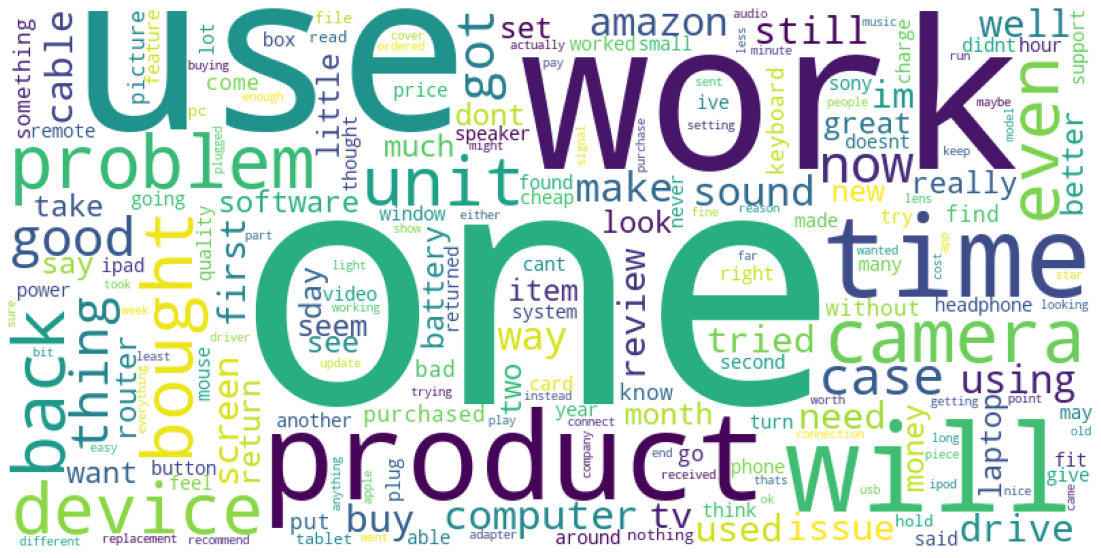

In [38]:
wc(negative_df,"white")

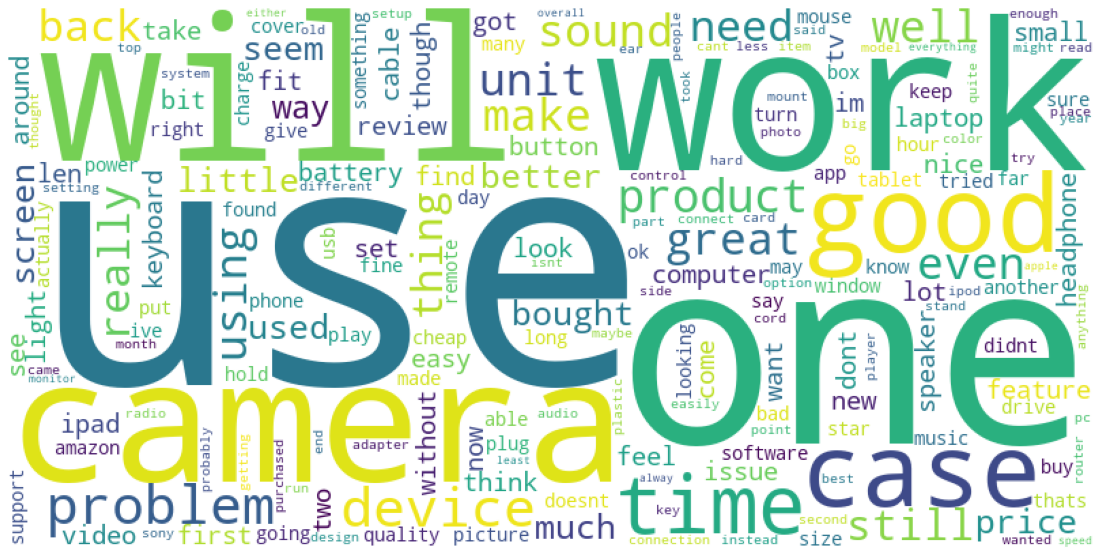

In [39]:
wc(neutral_df,"white")

Classification according to the overall column

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [41]:
df.overall=df.overall.astype("category")
x, y=df['reviewText'], df['sentimentOverall']

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=60)

In [43]:
vect=CountVectorizer()
x_train_dtm=vect.fit_transform(x_train,y_train)
x_test_dtm=vect.transform(x_test)

In [44]:
x_train_dtm.shape,x_test_dtm.shape

((63345, 130407), (21115, 130407))

In [48]:
b=MultinomialNB()
model=b.fit(x_train_dtm,y_train)
b_predict=b.predict(x_test_dtm)

In [49]:
accuracy_score(y_test,b_predict)

0.8298366090457021